In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('electiondata4.csv')

In [3]:
data.sample(4)

,ref,state,constituency,won status,votes,(votes),Name,Party Name
5859,5860,Tamil Nadu,KARUR(23),lost,102482,( -432424),SENTHILNATHAN. V.V,Bharatiya Janata Party
689,690,Punjab,Sangrur(12),lost,5139,( -358946),PARDEEP KUMAR,Apni Ekta Party
8818,8819,Jharkhand,Dhanbad(7),lost,457589,( -331583),ANUPAMA SINGH,Indian National Congress
3436,3437,West Bengal,Hooghly(28),lost,9268,( -693476),SURAJIT HEMBRAM,Independent


In [4]:
data['votes'] = pd.to_numeric(data['votes'], errors='coerce')

C:\Users\saksh\AppData\Local\Temp\ipykernel_30600\425193794.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['votes'] = pd.to_numeric(df['votes'], errors='coerce')


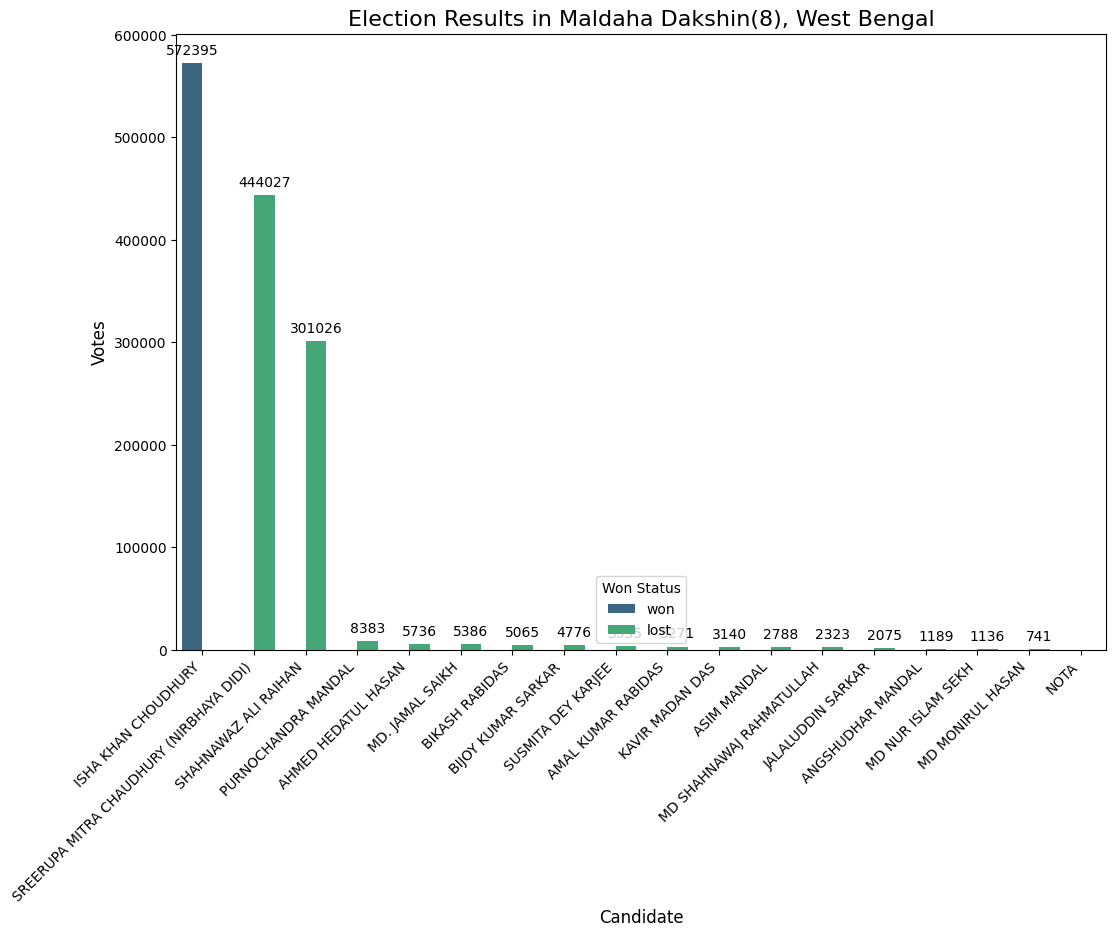

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create a plot for a given state and constituency
def plot_constituency(state, constituency):
    df = data[(data['state'] == state) & (data['constituency'] == constituency)]
    
    # Ensure the 'votes' column is numeric
    df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
    
    plt.figure(figsize=(12, 8))
    
    barplot = sns.barplot(x='Name', y='votes', data=df, hue='won status', palette='viridis')
    
    plt.title(f'Election Results in {constituency}, {state}', fontsize=16)
    plt.xlabel('Candidate', fontsize=12)
    plt.ylabel('Votes', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    
    # Adding annotations to indicate win or loss status
    for p in barplot.patches:
        barplot.annotate(format(p.get_height(), '.0f'), 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha = 'center', va = 'center', 
                         xytext = (0, 9), 
                         textcoords = 'offset points')
    
    plt.legend(title='Won Status')
#     st.pyplot(plt)

# Example usage
state = 'West Bengal'
constituency = 'Maldaha Dakshin(8)'
plot_constituency(state, constituency)



In [6]:
import requests
from bs4 import BeautifulSoup

In [7]:
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}
webpage = requests.get('https://results.eci.gov.in/PcResultGenJune2024/index.htm',headers = headers).text

In [8]:
soup = BeautifulSoup(webpage,'lxml')

In [9]:
table = soup.find('table', class_='table')

In [10]:
table

<table class="table">
<thead>
<tr>
<th style="text-align: left;">Party</th>
<th style="text-align:right">Won</th>
<th style="text-align:right">Leading</th>
<th style="text-align:right">Total</th>
</tr>
</thead>
<tbody>
<tr class="tr">
<td style="text-align:left">Bharatiya Janata Party - BJP</td>
<td style="text-align:right">
<a href="partywisewinresultState-369.htm">240</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                                    </td>
<td style="text-align:right">240</td>
</tr>
<tr class="tr">
<td style="text-align:left">Indian National Congress - INC</td>
<td style="text-align:right">
<a href="partywisewinresultState-742.htm">99</a>
</td>
<td style="text-align:right">
                                                                                        0
                                                                              

In [11]:
table = soup.find_all('table', class_='table')
table_result=[]
for i in table:
    table_row = i.find_all('tr',class_='tr')
    for j in table_row:
        table_td = j.find('td')
        if table_td:
            table_result.append(table_td.text)

In [12]:
table_result

['Bharatiya Janata Party - BJP',
 'Indian National Congress - INC',
 'Samajwadi Party - SP',
 'All India Trinamool Congress - AITC',
 'Dravida Munnetra Kazhagam - DMK',
 'Telugu Desam - TDP',
 'Janata Dal  (United) - JD(U)',
 'Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT',
 'Nationalist Congress Party – Sharadchandra Pawar - NCPSP',
 'Shiv Sena - SHS',
 'Lok Janshakti Party(Ram Vilas) - LJPRV',
 'Yuvajana Sramika Rythu Congress Party - YSRCP',
 'Rashtriya Janata Dal - RJD',
 'Communist Party of India  (Marxist) - CPI(M)',
 'Indian Union Muslim League - IUML',
 'Aam Aadmi Party - AAAP',
 'Jharkhand Mukti Morcha - JMM',
 'Janasena Party - JnP',
 'Communist Party of India  (Marxist-Leninist)  (Liberation) - CPI(ML)(L)',
 'Janata Dal  (Secular) - JD(S)',
 'Viduthalai Chiruthaigal Katchi - VCK',
 'Communist Party of India - CPI',
 'Rashtriya Lok Dal - RLD',
 'Jammu & Kashmir National Conference - JKN',
 'United People’s Party, Liberal - UPPL',
 'Asom Gana Parishad - AGP',
 'Hindustani Awa

In [13]:
table = soup.find_all('table', class_='table')
won=[]
for i in table:
    table_row = i.find_all('tr',class_='tr')
    for j in table_row:
        table_td = j.find_all('td')[1]
        if table_td:
            won.append(table_td.text.strip())

In [14]:
won

['240',
 '99',
 '37',
 '29',
 '22',
 '16',
 '12',
 '9',
 '8',
 '7',
 '5',
 '4',
 '4',
 '4',
 '3',
 '3',
 '3',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '7']

In [15]:
table = soup.find_all('table', class_='table')
Leading=[]
for i in table:
    table_row = i.find_all('tr',class_='tr')
    for j in table_row:
        table_td = j.find_all('td')[2]
        if table_td:
            Leading.append(table_td.text.strip())

In [16]:
Leading

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0']

In [17]:
table = soup.find_all('table', class_='table')
total=[]
for i in table:
    table_row = i.find_all('tr',class_='tr')
    for j in table_row:
        table_td = j.find_all('td')[3]
        if table_td:
            total.append(table_td.text.strip())

In [18]:
total

['240',
 '99',
 '37',
 '29',
 '22',
 '16',
 '12',
 '9',
 '8',
 '7',
 '5',
 '4',
 '4',
 '4',
 '3',
 '3',
 '3',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '7']

In [19]:
import pandas as pd

In [29]:
data= pd.DataFrame({'Party':table_result,'Won':won,'Leading':Leading,'Total':total})

In [30]:
data.to_csv('first.csv',index=False)

In [31]:
data.head()

,Party,Won,Leading,Total
0,Bharatiya Janata Party - BJP,240,0,240
1,Indian National Congress - INC,99,0,99
2,Samajwadi Party - SP,37,0,37
3,All India Trinamool Congress - AITC,29,0,29
4,Dravida Munnetra Kazhagam - DMK,22,0,22


In [32]:
import matplotlib.pyplot as plt

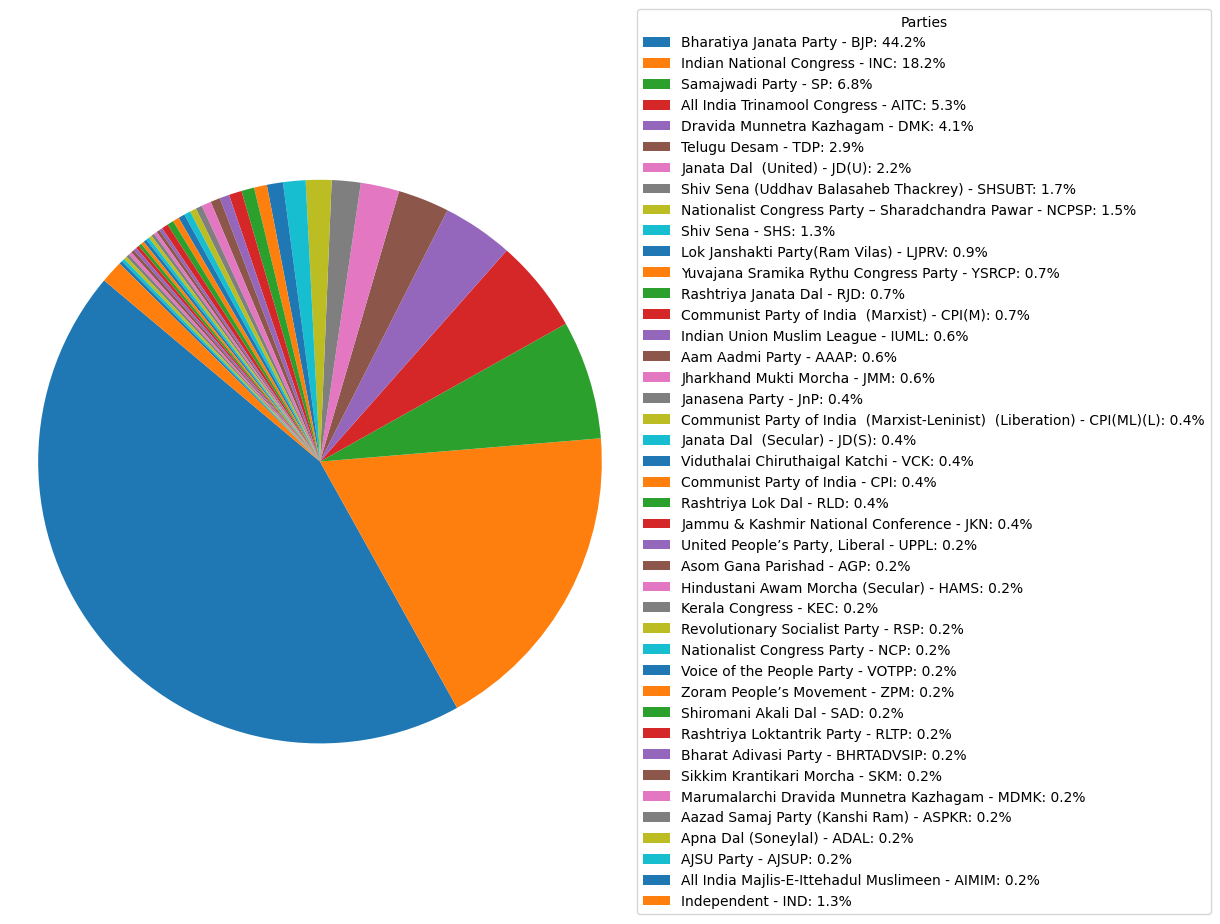

In [54]:
data = pd.DataFrame({
    'Party': data['Party'],
    'Won': data['Won']
})
data['Won'] = pd.to_numeric(data['Won'])
total_votes = data['Won'].sum()
data['Percentage'] = (data['Won'] / total_votes) * 100

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    data['Won'], 
#     labels=data['Party'], 
    autopct='', 
    startangle=140,
)


legend_labels = [f"{party}: {percentage:.1f}%" for party, percentage in zip(data['Party'], data['Percentage'])]

plt.axis('equal')
plt.legend(wedges, legend_labels, title="Parties", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

In [44]:
data['Won'] = pd.to_numeric(data['Won'])
total_votes = data['Won'].sum()
data['Percentage'] = (data['Won'] / total_votes) * 100

In [45]:
data['Percentage']

0     44.198895
1     18.232044
2      6.813996
3      5.340700
4      4.051565
5      2.946593
6      2.209945
7      1.657459
8      1.473297
9      1.289134
10     0.920810
11     0.736648
12     0.736648
13     0.736648
14     0.552486
15     0.552486
16     0.552486
17     0.368324
18     0.368324
19     0.368324
20     0.368324
21     0.368324
22     0.368324
23     0.368324
24     0.184162
25     0.184162
26     0.184162
27     0.184162
28     0.184162
29     0.184162
30     0.184162
31     0.184162
32     0.184162
33     0.184162
34     0.184162
35     0.184162
36     0.184162
37     0.184162
38     0.184162
39     0.184162
40     0.184162
41     1.289134
Name: Percentage, dtype: float64

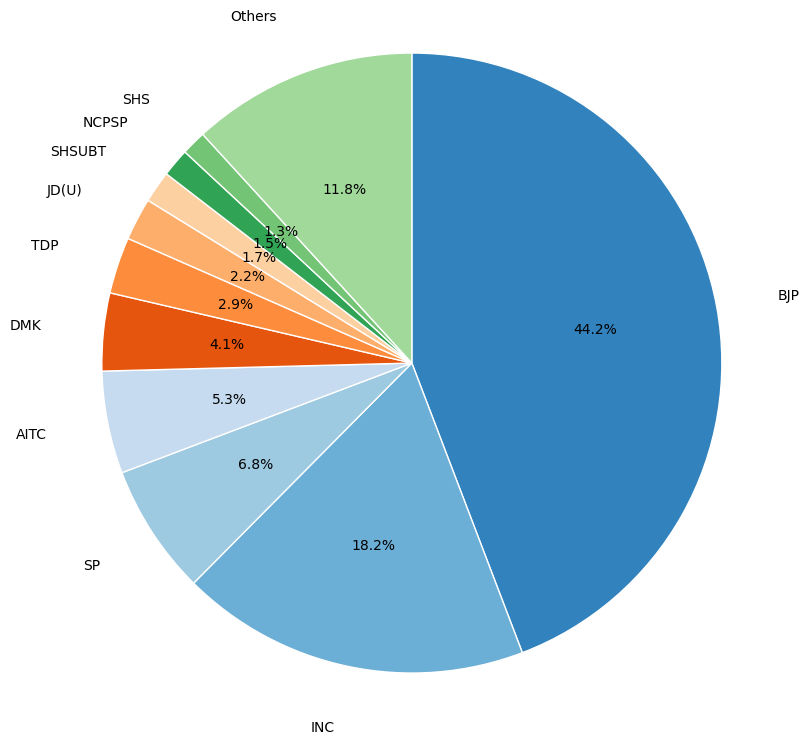

In [25]:
import matplotlib.pyplot as plt
import mplcursors

# Assuming you have the data
party_names = ['BJP', 'INC', 'SP', 'AITC', 'DMK', 
               'TDP', 'JD(U)', 'SHSUBT', 'NCPSP', 'SHS','Others']
won_seats = [240, 99, 37, 29, 22, 16, 12, 9, 8, 7,64]
colors = plt.cm.tab20c.colors  # Using a colormap for colors

# Create the half pie chart
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

# To create a semicircle, we need to adjust the start and end angle
wedges, texts, autotexts = ax.pie(
    won_seats, 
    labels=party_names, 
    autopct='%1.1f%%', 
    startangle=90,  # Start at the top
    counterclock=False,  # Draw clockwise
    colors=colors, 
    wedgeprops=dict(edgecolor='w'),
    labeldistance=1.2
)

# Hide the bottom half by setting the ylim
ax.set_ylim(0, 1)

# Add hover functionality
cursor = mplcursors.cursor(wedges, hover=True)

@cursor.connect("add")
def on_add(sel):
    wedge = wedges[sel.index]
    sel.annotation.set(text=f"{party_names[sel.index]}: {won_seats[sel.index]} seats")
    sel.annotation.get_bbox_patch().set(fc="white")

# Display the chart
plt.show()


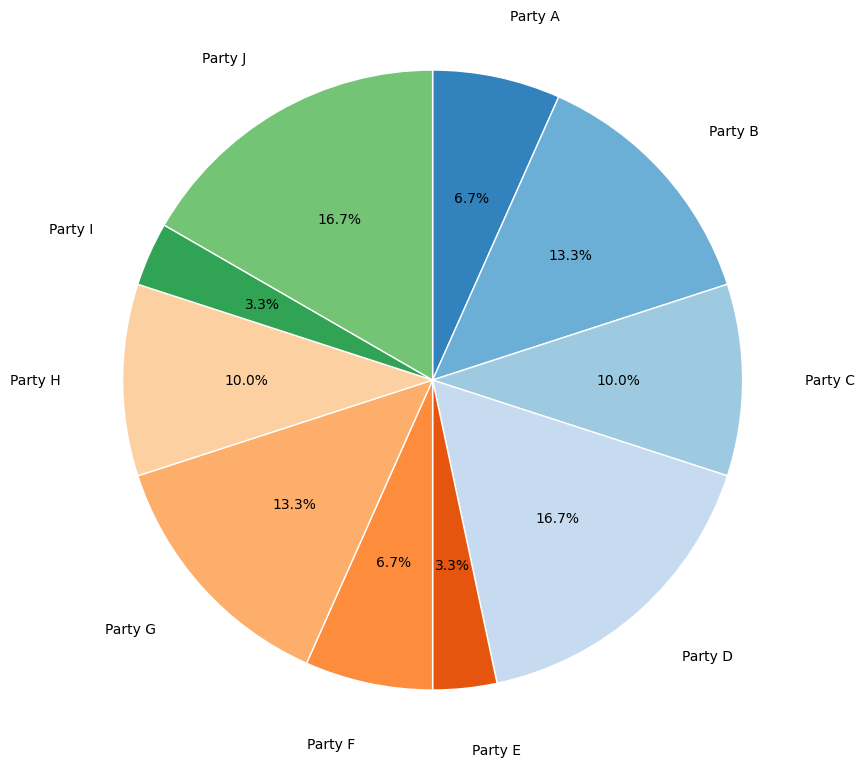

In [26]:
import matplotlib.pyplot as plt
import mplcursors

# Assuming you have the data
party_names = data['Party']
won_seats = data['Won']
colors = plt.cm.tab20c.colors  # Using a colormap for colors

# Create the half pie chart
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))

# To create a semicircle, we need to adjust the start and end angle
wedges, texts, autotexts = ax.pie(
    won_seats, 
    labels=party_names, 
    autopct='%1.1f%%', 
    startangle=90,  # Start at the top
    counterclock=False,  # Draw clockwise
    colors=colors, 
    wedgeprops=dict(edgecolor='w'),
    labeldistance=1.2
)

# Hide the bottom half by setting the ylim
ax.set_ylim(0, 1)

# Add hover functionality
cursor = mplcursors.cursor(wedges, hover=True)

@cursor.connect("add")
def on_add(sel):
    wedge = wedges[sel.index]
    sel.annotation.set(text=f"{party_names[sel.index]}: {won_seats[sel.index]} seats")
    sel.annotation.get_bbox_patch().set(fc="white")

# Display the chart
plt.show()
